<a href="https://colab.research.google.com/github/bsrsoylu/bsrsoylu/blob/main/New__York__City__Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

In [177]:
ny_airbnb_data = pd.read_csv("/content/AB_NYC_2019.csv")

ny_airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [178]:
numeric_mean = ny_airbnb_data.select_dtypes(include=[np.number]).mean()

ny_airbnb_data.fillna(numeric_mean, inplace=True)

In [179]:
ny_airbnb_data.isna().values.any()

True

In [180]:
ny_airbnb_data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [181]:
ny_airbnb_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,1.373221e+00,1.497775e+00,0.01000,2.800000e-01,1.220000e+00,1.580000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [182]:
ny_airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [183]:
ny_airbnb_data["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [184]:
neighbourhood_group = ny_airbnb_data["neighbourhood_group"].value_counts()

print(neighbourhood_group)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


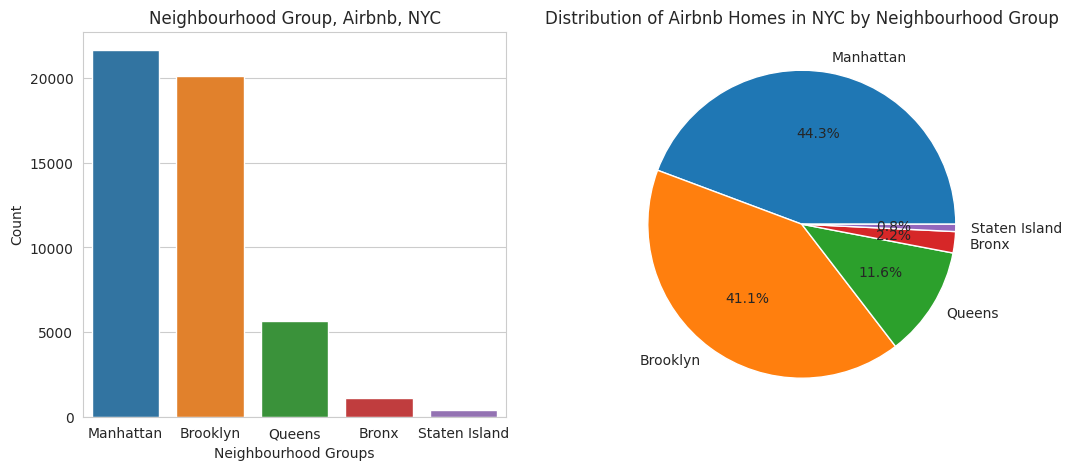

In [185]:
fig1 = plt.figure(figsize = (12, 5))


first_plot = fig1.add_subplot(1,2,1)

sns.barplot(x=neighbourhood_group.index, y=neighbourhood_group.values, data=ny_airbnb_data)

first_plot.set_title("Neighbourhood Group, Airbnb, NYC")
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Count')



second_plot = fig1.add_subplot(1,2,2)

second_plot.pie(neighbourhood_group.values, labels=neighbourhood_group.index, autopct='%1.1f%%')
second_plot.set_title("Distribution of Airbnb Homes in NYC by Neighbourhood Group")


plt.show()


In [186]:
ny_airbnb_data["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

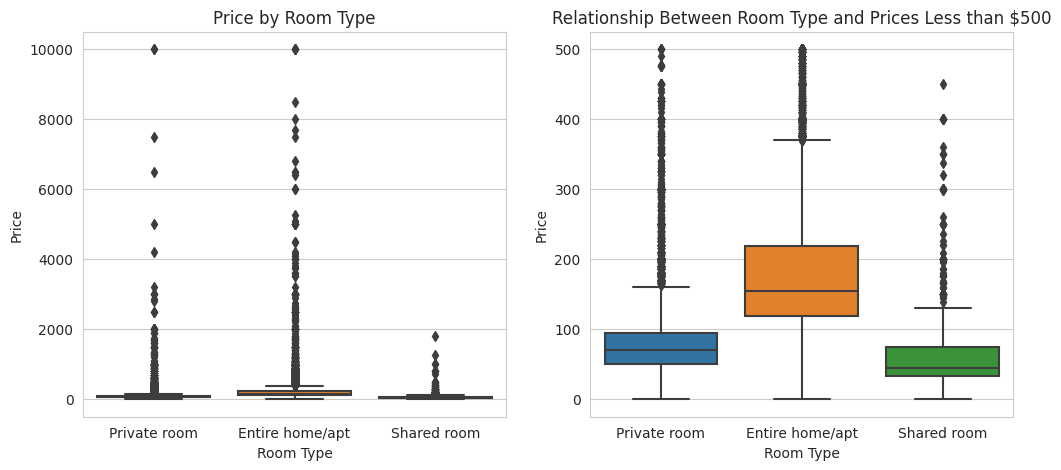

In [187]:
fig2 = plt.figure(figsize = (12,5))

first_plot = fig2.add_subplot(1,2,1)

sns.boxplot(x='room_type', y='price', data=ny_airbnb_data, ax=first_plot)

first_plot.set_title('Price by Room Type')
first_plot.set_xlabel('Room Type')
first_plot.set_ylabel('Price')


second_plot = fig2.add_subplot(1,2,2)

less_than_500 = ny_airbnb_data[ny_airbnb_data["price"]<500]

sns.boxplot(x="room_type", y="price", data=less_than_500, ax=second_plot)

plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Relationship Between Room Type and Prices Less than $500")


plt.show()

neighbourhood
Bedford-Stuyvesant    110352
Williamsburg           85427
Harlem                 75962
Bushwick               52514
Hell's Kitchen         50227
East Village           44670
East Harlem            36446
Crown Heights          36408
Upper West Side        36058
Upper East Side        31686
Name: number_of_reviews, dtype: int64


Text(0.5, 1.0, 'Top 10 Neighbourhoods by Number of Reviews')

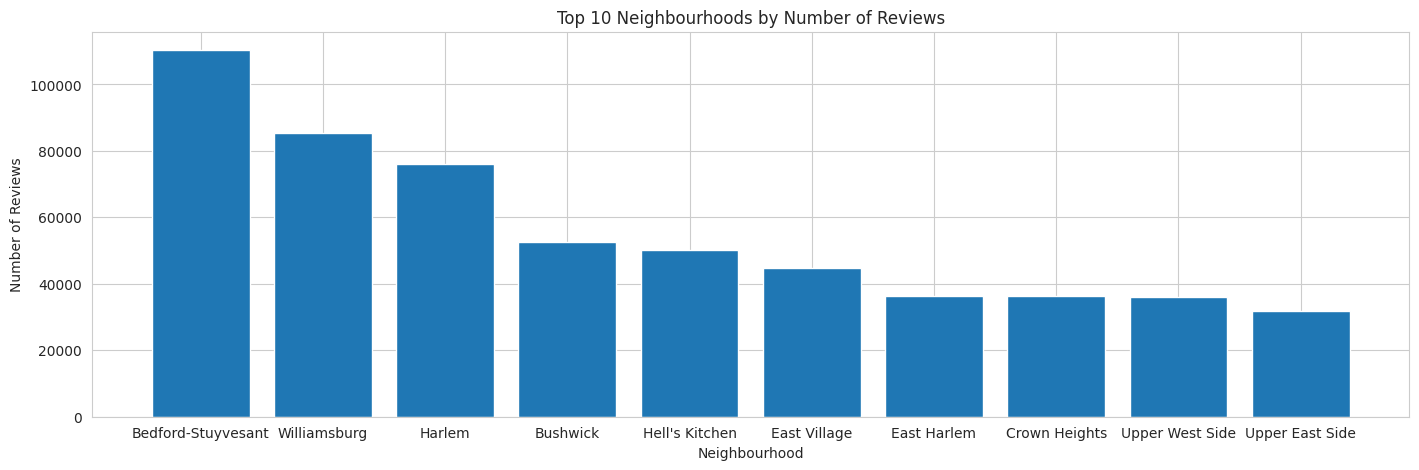

In [188]:
neighbourhood_sum = ny_airbnb_data.groupby("neighbourhood")["number_of_reviews"].sum()

sorted_neighbourhood = neighbourhood_sum.sort_values(ascending=False)

top_10_neighbourhood = sorted_neighbourhood.head(10)

print(top_10_neighbourhood)

plt.figure(figsize=(17,5))
plt.bar(top_10_neighbourhood.index, top_10_neighbourhood.values)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reviews')

plt.title('Top 10 Neighbourhoods by Number of Reviews')

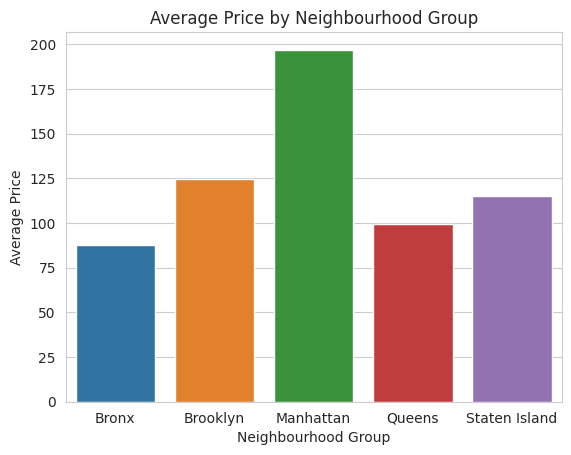

In [189]:
average_prices = ny_airbnb_data.groupby('neighbourhood_group')['price'].mean()

sns.barplot(x=average_prices.index, y=average_prices.values, data=ny_airbnb_data)

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood Group')

plt.show()

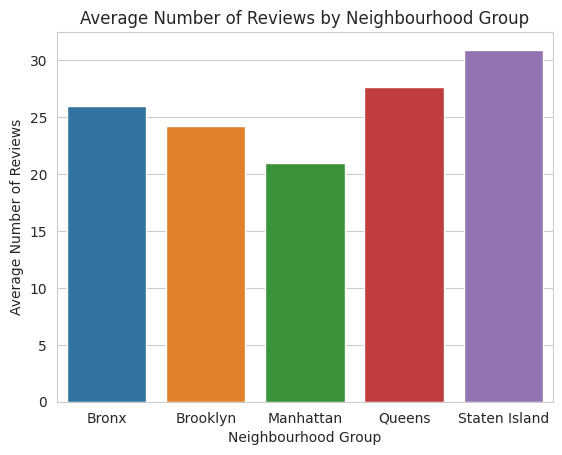

In [190]:
average_reviews = ny_airbnb_data.groupby('neighbourhood_group')['number_of_reviews'].mean()

sns.barplot(x=average_reviews.index, y=average_reviews.values, data=ny_airbnb_data)

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Number of Reviews')
plt.title('Average Number of Reviews by Neighbourhood Group')

plt.show()

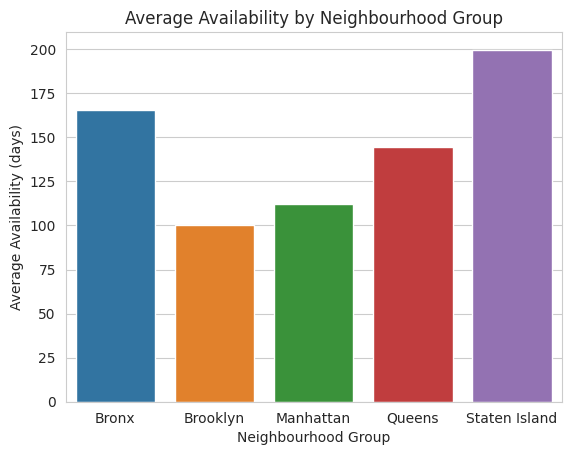

In [191]:
average_availability = ny_airbnb_data.groupby('neighbourhood_group')['availability_365'].mean()

sns.barplot(x=average_availability.index, y=average_availability.values, data=ny_airbnb_data)

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability (days)')
plt.title('Average Availability by Neighbourhood Group')

plt.show()

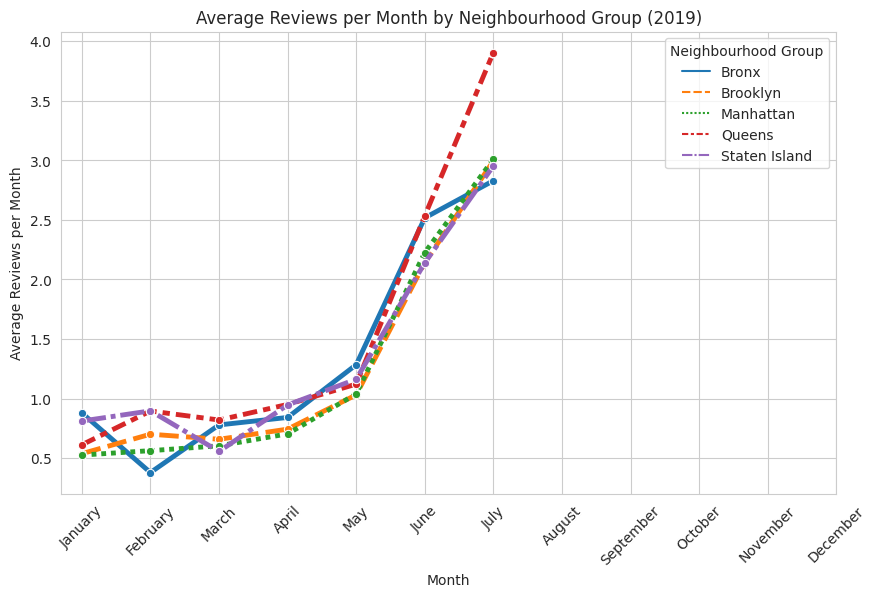

In [192]:
ny_airbnb_data['last_review'] = pd.to_datetime(ny_airbnb_data['last_review'])

data_2019 = ny_airbnb_data['last_review'].dt.year == 2019

reviews_by_month = ny_airbnb_data[data_2019].groupby([ny_airbnb_data[data_2019]['last_review'].dt.month, 'neighbourhood_group'])['reviews_per_month'].mean().unstack()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=reviews_by_month, marker='o', linewidth=3.5)

plt.xticks(range(1, 13), months, rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Reviews per Month')
plt.title('Average Reviews per Month by Neighbourhood Group (2019)')
plt.legend(title='Neighbourhood Group')
plt.grid(True)

plt.show()

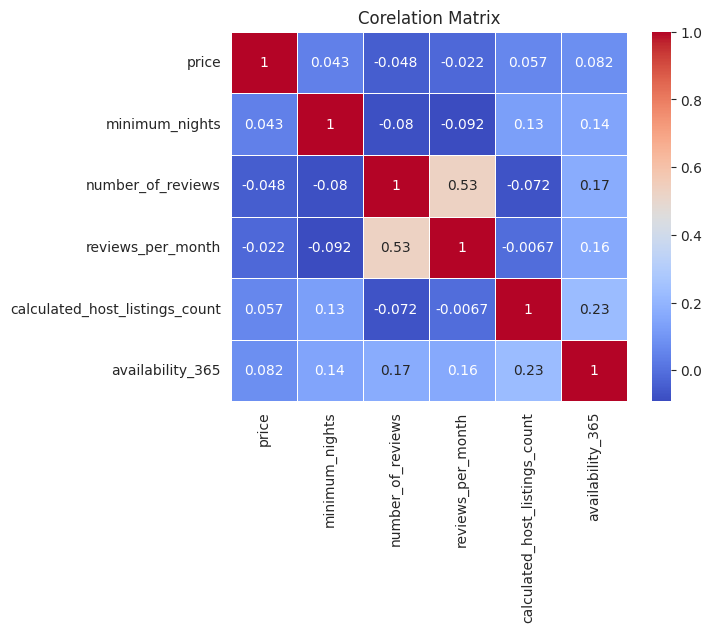

In [193]:
coleration_columns = ['price','minimum_nights', 'number_of_reviews', 'reviews_per_month',
                    'calculated_host_listings_count', 'availability_365']

sns.heatmap(ny_airbnb_data[coleration_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Corelation Matrix")
plt.savefig("Correlation_matrix.png")

Text(0.5, 1.0, 'Density Relationship Between Room Type and Prices Less than $500')

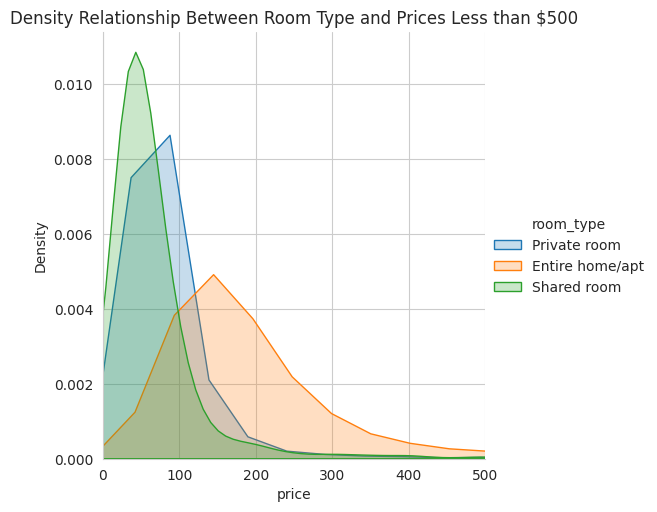

In [194]:
((sns.FacetGrid(ny_airbnb_data, hue="room_type", height=5, xlim=(0,500))).map(sns.kdeplot, "price", fill=True).add_legend());

plt.title("Density Relationship Between Room Type and Prices Less than $500")

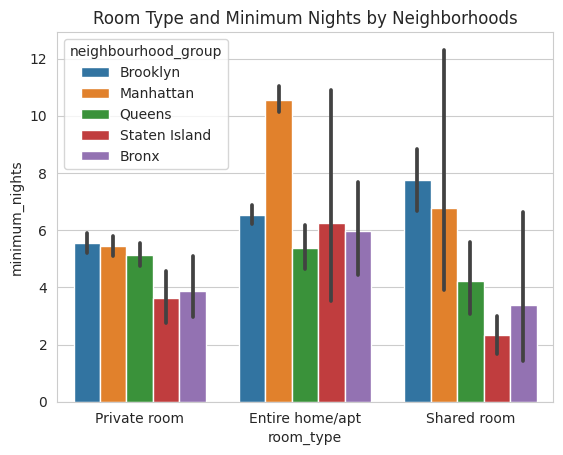

In [195]:
sns.barplot(x="room_type", y="minimum_nights", hue="neighbourhood_group", data=ny_airbnb_data);

plt.title("Room Type and Minimum Nights by Neighborhoods");

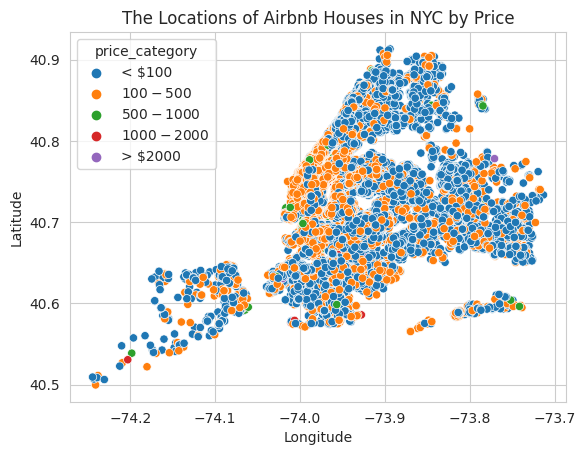

In [196]:
ny_airbnb_data['price_category'] = pd.cut(ny_airbnb_data['price'], bins=[-float('inf'), 100, 500, 1000, 2000, float('inf')],
                                labels=['< $100', '$100 - $500', '$500 - $1000', '$1000 - $2000', '> $2000'])


sns.scatterplot(x='longitude', y='latitude', hue='price_category', data=ny_airbnb_data)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('The Locations of Airbnb Houses in NYC by Price')


plt.show()
